##Gotta make sure you are using gpus

how meta!

<img src="http://g.recordit.co/eJsabFvf4E.gif" style="width: 10px;">

In [1]:
# where am I?
!ls 

datalab


In [2]:
# need order
!mkdir -p workdir
%cd workdir

/content/workdir


In [0]:
from google.colab import auth
auth.authenticate_user()

In [4]:
# gcs setting
project_id = 'fastai-colab'
!gcloud config set project {project_id}

Updated property [core/project].


In [0]:
# get me some data
!mkdir -p data
#!gsutil cp gs://fastai-colab/datasets/dogscats.zip data/dogscats.zip
#!unzip data/dogscats.zip -d data/
!wget http://files.fast.ai/data/dogscats.zip
!unzip dogscats.zip -d data/

--2018-03-29 01:06:12--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip.2’

dogscats.zip.2      100%[===================>] 817.50M  40.2MB/s    in 24s     

2018-03-29 01:06:36 (33.7 MB/s) - ‘dogscats.zip.2’ saved [857214334/857214334]

Archive:  dogscats.zip
replace data/dogscats/sample/train/cats/cat.2921.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
!pwd

/content/workdir


In [0]:
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

# get terminator
!pip install fastai

In [12]:
# may not be necessary
!apt-get install -y libtiff5-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libjbig-dev libjbig0 liblzma-dev libtiff5 libtiffxx5
Suggested packages:
  liblzma-doc
The following NEW packages will be installed:
  libjbig-dev libjbig0 liblzma-dev libtiff5 libtiff5-dev libtiffxx5
0 upgraded, 6 newly installed, 0 to remove and 0 not upgraded.
Need to get 622 kB of archives.
After this operation, 2,417 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/main amd64 libjbig0 amd64 2.1-3.1 [26.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/main amd64 libtiff5 amd64 4.0.8-5 [150 kB]
Get:3 http://archive.ubuntu.com/ubuntu artful/main amd64 libjbig-dev amd64 2.1-3.1 [24.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu artful/main amd64 liblzma-dev amd64 5.2.2-1.3 [145 kB]
Get:5 http://archive.ubuntu.com/ubuntu artful/main amd64 libtiffxx5 amd64 4.0.8-5 [5,724 B]
Get:6 http://archive.ubun

In [34]:
# on some of the VMs PIL is borked
# I am doing this out of abundance of caution
!pip install --no-cache-dir -I pillow==4.0.0

    100% |████████████████████████████████| 5.6MB 23.7MB/s 
    100% |████████████████████████████████| 112kB 30.8MB/s 
  Running setup.py install for olefile ... - done


In [0]:
#%reload_ext autoreload        <-------------- DO NOT USE 
#%autoreload 0                 <-------------- SAME SAME
%matplotlib inline

In [0]:
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
PATH = "data/dogscats/"
sz=224

In [32]:
torch.cuda.is_available()

True

In [19]:
torch.backends.cudnn.enabled

True

In [20]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.2768.jpg',
 'cat.11675.jpg',
 'cat.10152.jpg',
 'cat.4802.jpg',
 'cat.1198.jpg']

In [37]:
PIL.__version__

'4.0.0'

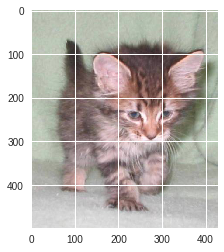

In [36]:
# yay, kitty!!! 
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [38]:
# lets learn
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 31102097.52it/s]


100%|██████████| 32/32 [00:12<00:00,  2.53it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[0.      0.05255 0.02476 0.9917 ]
[1.      0.056   0.02522 0.99219]



In [40]:
# too bad the timing widgets do not persist
learn.fit(0.01, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[0.      0.03884 0.02288 0.99219]
[1.      0.04861 0.02505 0.99121]



In [41]:
# This is the label for a val data
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [42]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['cats', 'dogs']

In [43]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


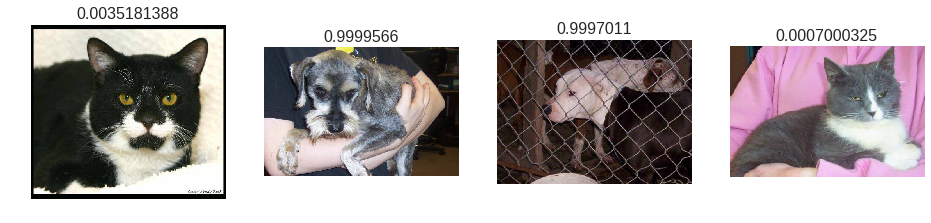

In [47]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")


Incorrectly classified


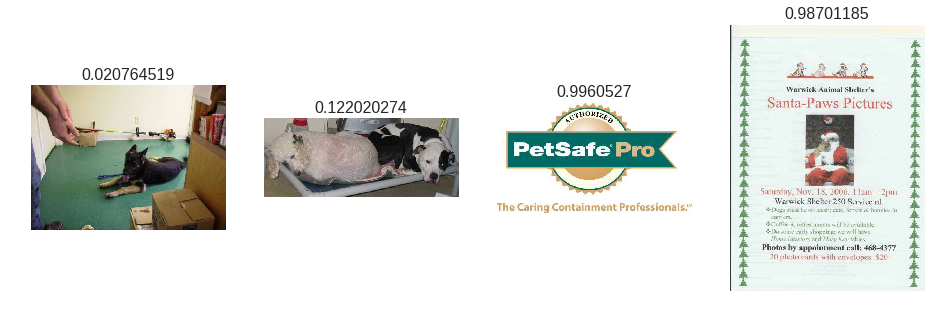

In [48]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")


In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)


Most correct cats


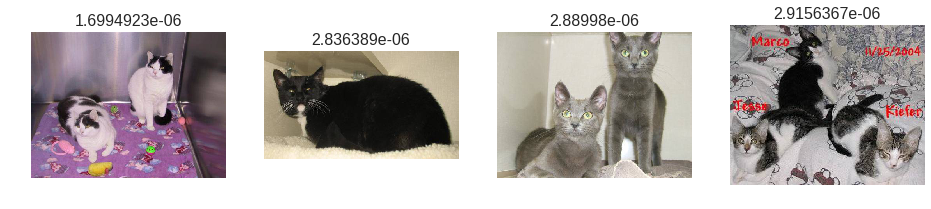

In [50]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


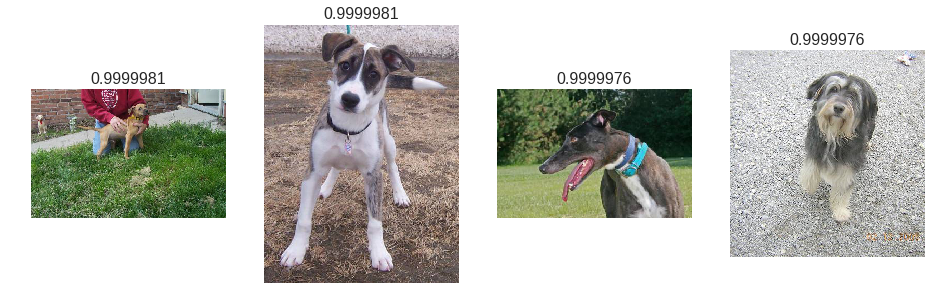

In [51]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")


Most incorrect cats


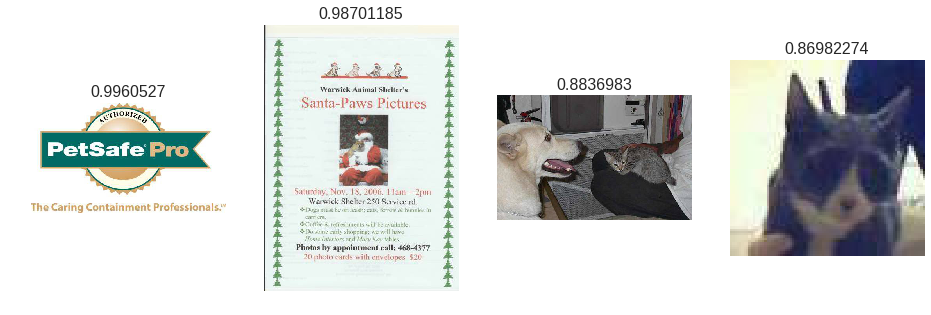

In [52]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")


Most incorrect dogs


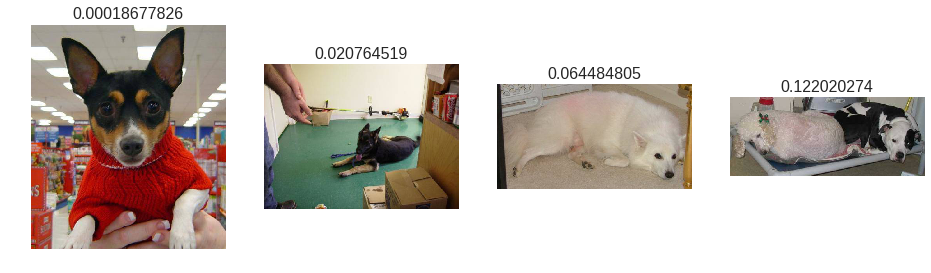

In [53]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")


Most uncertain predictions


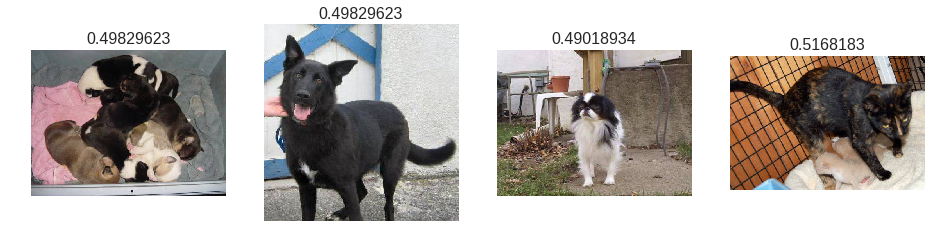

In [54]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")


In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [56]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████▏ | 293/360 [00:08<00:01, 35.12it/s, loss=0.478]


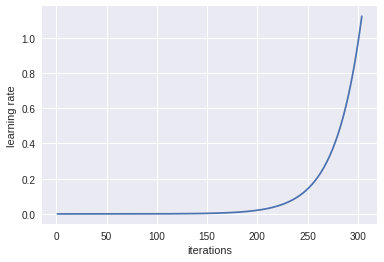

In [57]:
learn.sched.plot_lr()


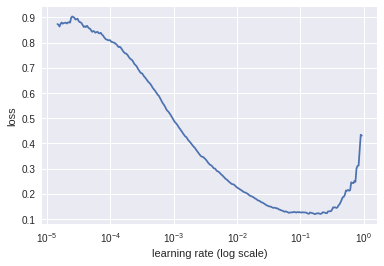

In [58]:
learn.sched.plot()

In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)


In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

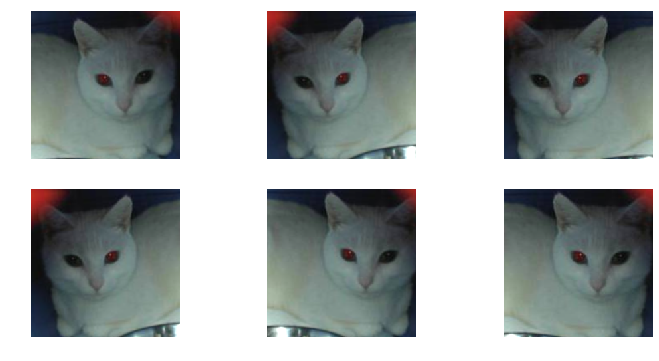

In [62]:
plots(ims, rows=2)


In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)


In [64]:
learn.fit(1e-2, 1)


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[0.      0.05565 0.02456 0.99121]



In [0]:
learn.precompute=False


In [0]:
learn.fit(1e-2, 3, cycle_len=1)


HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

 63%|██████▎   | 226/360 [01:45<01:02,  2.14it/s, loss=0.0466]

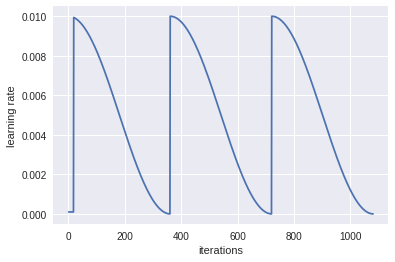

In [0]:
learn.sched.plot_lr()


In [0]:
learn.save('/tmp/224_lastlayer')


In [0]:
learn.unfreeze()


In [0]:
lr=np.array([1e-4,1e-3,1e-2])


In [0]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)


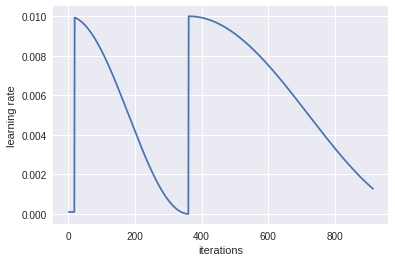

In [0]:
#too impatient ...
learn.sched.plot_lr()


In [0]:
len(data.trn_ds.fnames)

23000

In [0]:
!ls data/dogscats/train/dogs/ | wc -l


11500


359.375